# Expected Risk Minimization
2 examples with different distributions of classes

In [0]:
#import the required packages
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

#setting the size of the plot
plt.rcParams['figure.figsize'] = [10, 10]

# Example 1

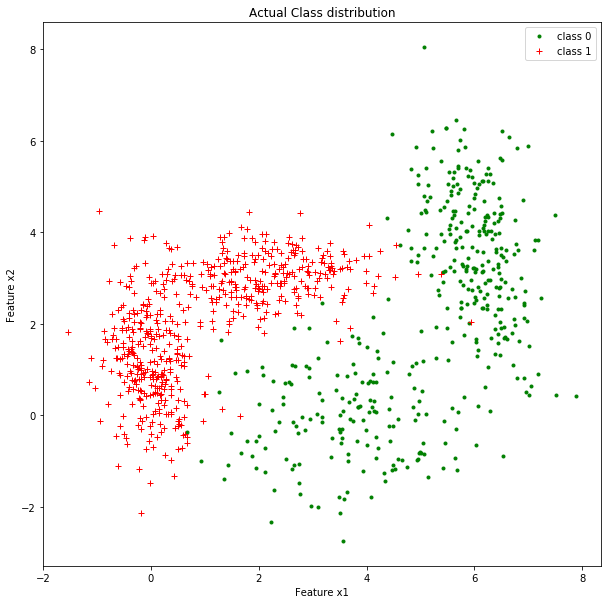

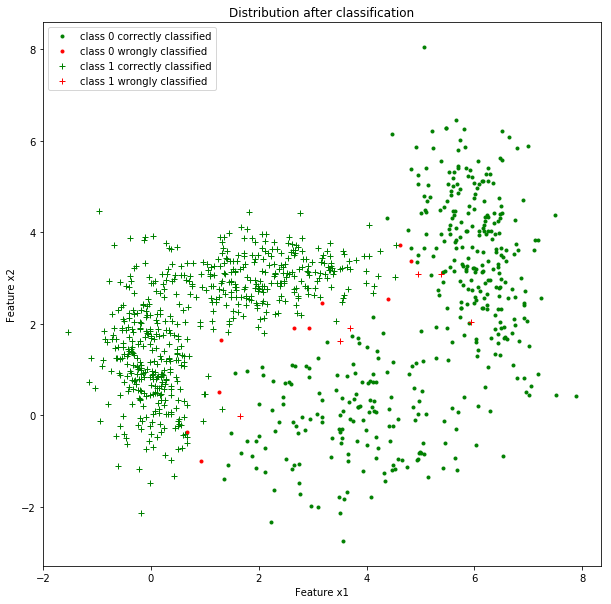

In [2]:
# seed to recreate the same results everytime
np.random.seed(1000)

features = 2 # number of features
samples = 1000 #number of samples to be generated

# Mean matrix for different distributions
mean = np.zeros((2,4)) 
mean[:,0] = [4,0] 
mean[:,1] = [6,4]
mean[:,2] = [0,1]
mean[:,3] = [2,3]

# Covariance matrix for the  different distributions
cov = np.zeros((2,2,4))
cov[:,:,0] = np.array([[5,1],[1,4]])/3.0  
cov[:,:,1] = np.array([[3,-2], [-2, 15]])/10.0
cov[:,:,2] = np.array([[3,-2], [-2, 15]])/13.0
cov[:,:,3] = np.array([[15,1],[1,3]])/13.0

# priors for two classes
prior = [0.4, 0.6]

# prior for different gaussions of distribution of class 0
prior_gmm0 = [0.5,0.5]
# prior for different gaussions of distribution of class 1
prior_gmm1 = [0.5,0.5]

# Cost/loss matrix 
loss = np.array([[0,1], [1,0]])

'''label matrix where first row corresponds to true labels and second row 
the labels corresponding to labels of decisions made'''
label = np.zeros((2,samples))

# Randomly generate labels
label[0,:] = (np.random.uniform(0,1,samples) >= prior[0]).astype(int)
X = np.zeros((features,samples))

# Generate the data
for index in range(samples):
    if(label[0,index] == 0):
        if(np.random.uniform(0,1,1) >= prior_gmm0[0]):
            X[:,index] = np.random.multivariate_normal(mean[:,0],cov[:,:,0],1)
        else:
            X[:,index] = np.random.multivariate_normal(mean[:,1],cov[:,:,1],1)
    else:
        if(np.random.uniform(0,1,1) >= prior_gmm1[0]):
            X[:,index] = np.random.multivariate_normal(mean[:,2],cov[:,:,2],1)
        else:
            X[:,index] = np.random.multivariate_normal(mean[:,3],cov[:,:,3],1)


# Gamma/ threshold
gamma = ((loss[1,0]-loss[0,0])/(loss[1,0] - loss[1,1])) * (prior[0]/prior[1])


# Calculation for discriminant score and decisions
logValpdf1 = np.log(prior_gmm1[0] *(multivariate_normal.pdf(X.T,mean=mean[:,2], cov = cov[:,:,2])) + prior_gmm1[1] * (multivariate_normal.pdf(X.T,mean=mean[:,3], cov = cov[:,:,3])))
logValpdf0 =  np.log(prior_gmm0[0]*(multivariate_normal.pdf(X.T,mean = mean[:,0],cov = cov[:,:,0])) + prior_gmm0[1] * (multivariate_normal.pdf(X.T,mean=mean[:,1], cov = cov[:,:,1])))

discriminant_score = logValpdf1 - logValpdf0

label[1,:] = (discriminant_score >= np.log(gamma)).astype(int)


# Code to Plot the actual distribution
x00 = [i for i in range(label.shape[1]) if (label[0,i] == 0)]
x01 = [i for i in range(label.shape[1]) if (label[0,i] == 0)]
x10 = [i for i in range(label.shape[1]) if (label[0,i] == 1)]
x11 = [i for i in range(label.shape[1]) if (label[0,i] == 1 )]
plt.plot(X[0,x00],X[1,x00],'.',color ='g')
plt.plot(X[0,x11],X[1,x11],'+',color = 'r')
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend(["class 0",'class 1'])
plt.title("Actual Class distribution")
plt.show()

# Code to plot the distribution after Classification
x00 = [i for i in range(label.shape[1]) if (label[0,i] == 0 and label[1,i] == 0)]
x01 = [i for i in range(label.shape[1]) if (label[0,i] == 0 and label[1,i] == 1)]
x10 = [i for i in range(label.shape[1]) if (label[0,i] == 1 and label[1,i] == 0)]
x11 = [i for i in range(label.shape[1]) if (label[0,i] == 1 and label[1,i] == 1)]
plt.plot(X[0,x00],X[1,x00],'.',color ='g')
plt.plot(X[0,x01],X[1,x01],'.',color = 'r')
plt.plot(X[0,x11],X[1,x11],'+',color ='g')
plt.plot(X[0,x10],X[1,x10],'+',color = 'r')
plt.legend(["class 0 correctly classified",'class 0 wrongly classified','class 1 correctly classified','class 1 wrongly classified'])
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.title('Distribution after classification')
plt.show()






# Example 2

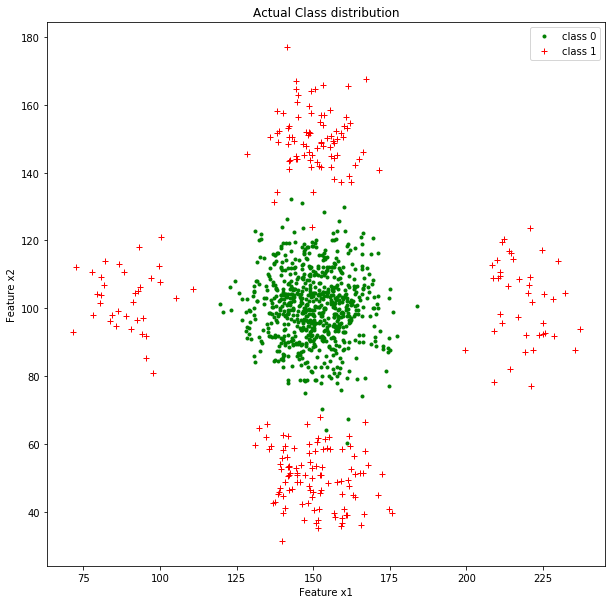

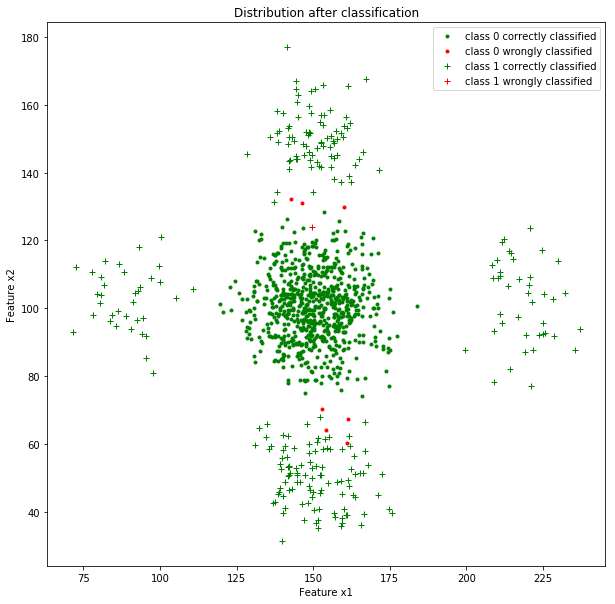

<Figure size 2160x2160 with 0 Axes>

In [3]:
# seed to recreate the same results everytime
np.random.seed(1234)

features = 2
samples = 1000
mean = np.zeros((2,5))
mean[:,0] = [150,100] 
mean[:,1] = [150,150]
mean[:,2] = [220,100]
mean[:,3] = [150,50]
mean[:,4] = [90,100]

cov = np.zeros((2,2,5))

cov[:,:,0] = np.array([[100,0],[0,100]]) 
cov[:,:,1] = np.array([[100,0],[0,100]]) 
cov[:,:,2] = np.array([[100,0],[0,100]]) 
cov[:,:,3] = np.array([[100,0],[0,100]]) 
cov[:,:,4] = np.array([[100,0],[0,100]]) 
prior = [0.75, 0.25]
prior_gmm = [0.3,0.2,0.35,0.15]
loss = np.array([[0,1], [1,0]])

label = np.zeros((features,samples))
label[0,:] = (np.random.uniform(0,1,samples) >= prior[0]).astype(int)
X = np.zeros((features,samples))
for index in range(samples):
    
    if(label[0,index] == 0):
            X[:,index] = np.random.multivariate_normal(mean[:,0],cov[:,:,0],1)
    else:
        random = np.random.uniform(0,1,1)
        if(random <= prior_gmm[0]): 
            X[:,index] = np.random.multivariate_normal(mean[:,1],cov[:,:,1],1)
        elif((random > prior_gmm[0]) and (random <= (prior_gmm[0]+ prior_gmm[1]))):
            X[:,index] = np.random.multivariate_normal(mean[:,2],cov[:,:,2],1)
        elif((random > (prior_gmm[0]+prior_gmm[1])) and (random <= (prior_gmm[0]+ prior_gmm[1]+prior_gmm[2]))):
            X[:,index] = np.random.multivariate_normal(mean[:,3],cov[:,:,3],1)
        else:
            X[:,index] = np.random.multivariate_normal(mean[:,4],cov[:,:,4],1)


gamma = ((loss[1,0]-loss[0,0])/(loss[1,0] - loss[1,1])) * (prior[0]/prior[1])


logValpdf1 =  np.log(0.3 * multivariate_normal.pdf(X.T,mean=mean[:,1], cov = cov[:,:,1]) + 
(0.2 * multivariate_normal.pdf(X.T,mean=mean[:,2], cov = cov[:,:,2])) +  
(0.35 * multivariate_normal.pdf(X.T,mean=mean[:,3], cov = cov[:,:,3]))+ 
(0.15 * multivariate_normal.pdf(X.T,mean=mean[:,4], cov = cov[:,:,4])))
              
             
              
logValpdf0 = np.log(multivariate_normal.pdf(X.T,mean = mean[:,0],cov = cov[:,:,0])) 
discriminant_score = logValpdf1 - logValpdf0
label[1,:] = (discriminant_score >= np.log(gamma)).astype(int)



x00 = [i for i in range(label.shape[1]) if (label[0,i] == 0)]
x01 = [i for i in range(label.shape[1]) if (label[0,i] == 0)]
x10 = [i for i in range(label.shape[1]) if (label[0,i] == 1)]
x11 = [i for i in range(label.shape[1]) if (label[0,i] == 1 )]
plt.plot(X[0,x00],X[1,x00],'.',color ='g')
plt.plot(X[0,x11],X[1,x11],'+',color = 'r')
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend(["class 0",'class 1'])
plt.title("Actual Class distribution")
plt.show()
plt.show()


x00 = [i for i in range(label.shape[1]) if (label[0,i] == 0 and label[1,i] == 0)]
x01 = [i for i in range(label.shape[1]) if (label[0,i] == 0 and label[1,i] == 1)]
x10 = [i for i in range(label.shape[1]) if (label[0,i] == 1 and label[1,i] == 0)]
x11 = [i for i in range(label.shape[1]) if (label[0,i] == 1 and label[1,i] == 1)]
plt.plot(X[0,x00],X[1,x00],'.',color ='g')
plt.plot(X[0,x01],X[1,x01],'.',color = 'r')
plt.plot(X[0,x11],X[1,x11],'+',color ='g')
plt.plot(X[0,x10],X[1,x10],'+',color = 'r')

plt.legend(["class 0 correctly classified",'class 0 wrongly classified','class 1 correctly classified','class 1 wrongly classified'],loc= 'upper right')
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.title('Distribution after classification')
plt.figure(figsize=(30,30))
plt.show()




